<a href="https://colab.research.google.com/github/Ashishkumarpanda/Netflix-ratings-prediction/blob/master/Netflix_rating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
a=files.upload()

In [183]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [159]:
data=pd.read_csv("netflix_titles.csv")
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [160]:
data.shape

(6234, 12)

In [161]:
cols=['director','cast','country','date_added']

In [162]:
data.drop(labels=cols,inplace=True,axis=1)

In [163]:
data.head()

,show_id,type,title,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [164]:
np.where(data['rating'].isnull())

(array([ 211, 2411, 3288, 4056, 4402, 4403, 4706, 5015, 5234, 6231]),)

In [165]:
data['rating'].fillna(method='ffill',inplace=True)
#data['date_added'].fillna(method='bfill',inplace=True)

In [166]:
#data['date_added']=LabelEncoder().fit_transform(data['date_added'])
data['show_id']=LabelEncoder().fit_transform(data['show_id'])
data['type']=LabelEncoder().fit_transform(data['type'])
data['release_year']=LabelEncoder().fit_transform(data['release_year'])
data['rating']=LabelEncoder().fit_transform(data['rating'])
data['duration']=LabelEncoder().fit_transform(data['duration'])
data['listed_in']=LabelEncoder().fit_transform(data['listed_in'])
data['description']=LabelEncoder().fit_transform(data['description'])
data['title']=LabelEncoder().fit_transform(data['title'])


In [167]:
data.head()

,show_id,type,title,release_year,rating,duration,listed_in,description
0,5981,0,3599,70,9,191,110,1903
1,2373,0,2445,67,8,195,420,3521
2,1000,1,5692,64,12,0,381,6130
3,1743,1,5696,67,11,0,381,5655
4,2531,0,4,68,6,200,167,5891


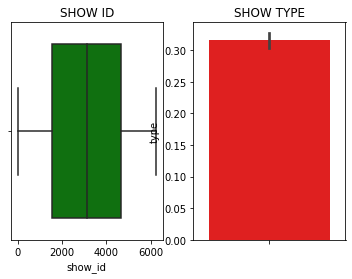

In [168]:
plt.subplot(1,2,1,title='SHOW ID')
sns.boxplot(data['show_id'],color='green')
plt.subplot(1,2,2,title='SHOW TYPE')
sns.barplot(y=data['type'],color='red')



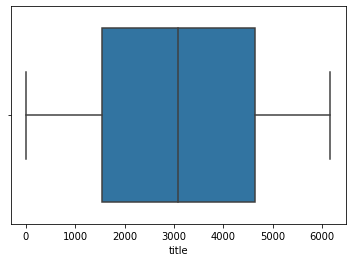

In [169]:

sns.boxplot(data['title'])

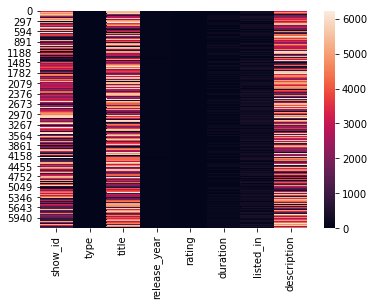

In [170]:
sns.heatmap(data)

Text(0, 0.5, 'Rating')

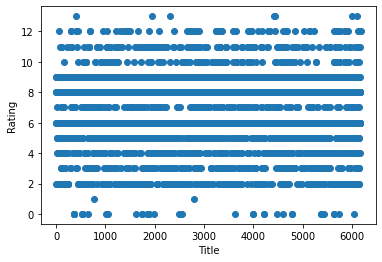

In [171]:
plt.scatter(data['title'],data['rating'])
plt.xlabel("Title")
plt.ylabel("Rating")

In [ ]:
x=data.iloc[:,[0,1,2,3,5,6,7]].values
y=data.iloc[:,4].values

In [174]:
data.head()

,show_id,type,title,release_year,rating,duration,listed_in,description
0,5981,0,3599,70,9,191,110,1903
1,2373,0,2445,67,8,195,420,3521
2,1000,1,5692,64,12,0,381,6130
3,1743,1,5696,67,11,0,381,5655
4,2531,0,4,68,6,200,167,5891


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [178]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [181]:
r=RandomForestClassifier(n_estimators=200,criterion='gini')
r.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [182]:
y_pred=r.predict(x_test)

In [ ]:
val=metrics.accuracy_score(y_test,y_pred)
print("accuracy is =",str(val*100)+" %")